In [1]:
"""
    Python script to explore advanced Python tools for machine learning. 
"""

#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [34]:
#1. Task-1
# load data to dataframe titanic_df
titanic_df = pd.read_csv("datasets/titanic.csv")

In [46]:
print()
print(titanic_df.head())
print()



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  



In [56]:
# Generate summary statistics
print()
print(titanic_df.describe())
print()



       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  



In [66]:
# Identify data types and missing values
print()
print(titanic_df.info())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



In [67]:

# Visualize the data distribution



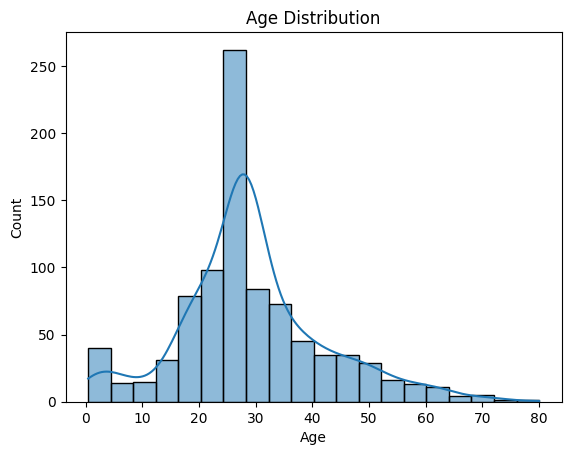

In [68]:
# Plot the age distribution
sns.histplot(titanic_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



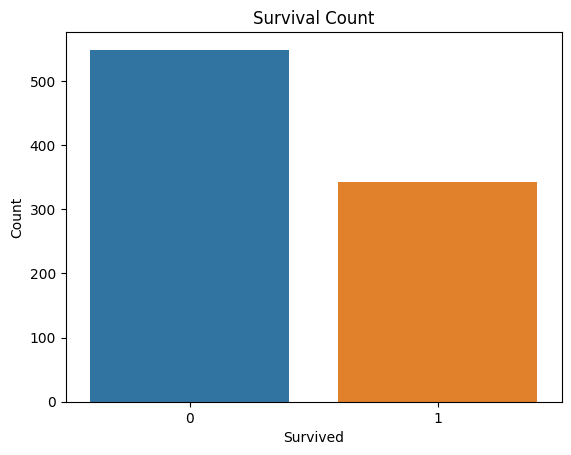

In [69]:
# Plot the survival count
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


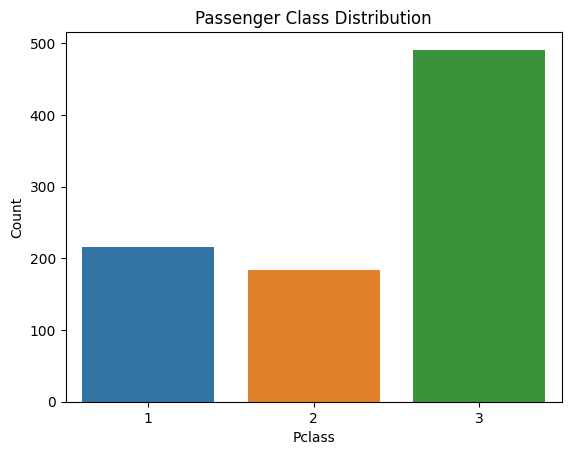

In [70]:
# Plot the distribution of passenger class
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

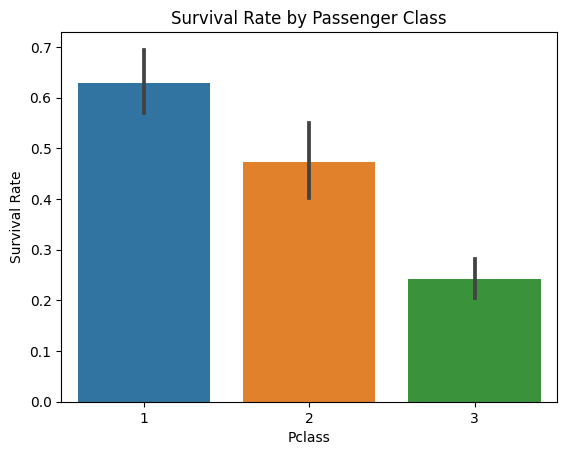

In [71]:
# Plot the survival rate based on passenger class
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()


In [72]:
#3.	Task 3: Data Preprocessing with Python 


In [73]:
#Data preprocessing
# Check for missing values in the dataset
print("Check for missing values in the dataset")
print(titanic_df.isnull().sum())
print()

Check for missing values in the dataset
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64



In [74]:
# Handle missing values in the "Age" column by replacing with the median
titanic_df["Age"].fillna(titanic_df["Age"].median(), inplace=True)

print()
print("Data post Handling missing values in Age column by replacing with the median")
print(titanic_df)
print()


Data post Handlins missing values in Age column by replacing with the median
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0  

In [75]:
# Handle missing values in the "Embarked" column by imputing with the most frequent value
titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0], inplace=True)

print()
print("Data post Handling missing values in Embarked column by replacing with the median")
print(titanic_df)
print()




Data post Handlins missing values in Embarked column by replacing with the median
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  3

In [76]:

# Extract title from the "Name" column as a new feature
titanic_df["Title"] = titanic_df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

print()
print("Extract title from the `Name` column as a new feature")
print(titanic_df)
print()



Extract title from the `Name` column as a new feature
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..            

In [77]:
# Group rare titles into a single category "Rare"
titanic_df["Title"] = titanic_df["Title"].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
                                                   'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

print()
print("Data post Grouping rare titles into a single category 'Rare'")
print(titanic_df)
print()


Data post Grouping rare titles into a single category 'Rare'
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..     

In [78]:
# Map common titles to specific categories
titanic_df["Title"] = titanic_df["Title"].replace('Mlle', 'Miss')
titanic_df["Title"] = titanic_df["Title"].replace('Ms', 'Miss')
titanic_df["Title"] = titanic_df["Title"].replace('Mme', 'Mrs')

print()
print("Data post mapping common titles to specific categories, `Mile` with `Miss`, `Ms` with `Miss`, `Mme` with `Mrs`")
print(titanic_df)
print()


Data post mapping common titles to specific categories, `Mile` with `Miss`, `Ms` with `Miss`, `Mme` with `Mrs`
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen,

In [79]:
# Preprocessing: Convert categorical features to numerical using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=["Sex", "Embarked", "Title"])


print()
print("Preprocessing: Convert categorical features to numerical using one-hot encoding")
print(titanic_df)
print()


Preprocessing: Convert categorical features to numerical using one-hot encoding
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0     

In [80]:
# Drop unnecessary columns like "Name", "Ticket", and "Cabin"
titanic_df.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

print()
print("Data post Drop unnecessary columns like `Name`, `Ticket`, and `Cabin`")
print(titanic_df)
print()



Data post Drop unnecessary columns like `Name`, `Ticket`, and `Cabin`
     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0              1         0       3  22.0      1      0   7.2500       False   
1              2         1       1  38.0      1      0  71.2833        True   
2              3         1       3  26.0      0      0   7.9250        True   
3              4         1       1  35.0      1      0  53.1000        True   
4              5         0       3  35.0      0      0   8.0500       False   
..           ...       ...     ...   ...    ...    ...      ...         ...   
886          887         0       2  27.0      0      0  13.0000       False   
887          888         1       1  19.0      0      0  30.0000        True   
888          889         0       3  28.0      1      2  23.4500        True   
889          890         1       1  26.0      0      0  30.0000       False   
890          891         0       3  32.0      0      0   7.7

In [81]:
#4.	Task 4: Implement Machine Learning Models with Python 
# Separate features (X) and target (y)
X = titanic_df.drop(columns=["Survived"])
y = titanic_df["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:

# Create and fit the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

print()
print("SVM Model")
print(svm_model)
print()



SVM Model
SVC(kernel='linear', random_state=42)



In [83]:
# Create and fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print()
print("Random Forest Model")
print(rf_model)
print()



Random Forest Model
RandomForestClassifier(random_state=42)



In [84]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    # Evaluation metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Print evaluation results
    print("Model Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(confusion)

In [85]:
# Evaluate the SVM model
print()
print()
print("SVM Model:")
evaluate_model(svm_model, X_test, y_test)



SVM Model:
Model Evaluation:
Accuracy: 0.81
Precision: 0.78
Recall: 0.76
F1 Score: 0.77
Confusion Matrix:
[[89 16]
 [18 56]]


In [86]:
# Evaluate the Random Forest model
print("Random Forest Model:")
evaluate_model(rf_model, X_test, y_test)

Random Forest Model:
Model Evaluation:
Accuracy: 0.86
Precision: 0.83
Recall: 0.84
F1 Score: 0.83
Confusion Matrix:
[[92 13]
 [12 62]]


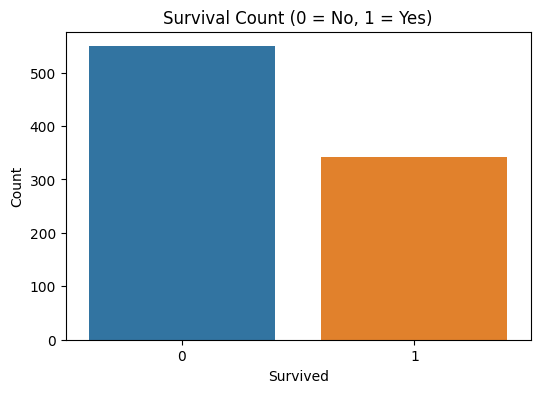

In [87]:
#5.	Task 5: Visualization with Python 

# Data Visualization

plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=titanic_df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


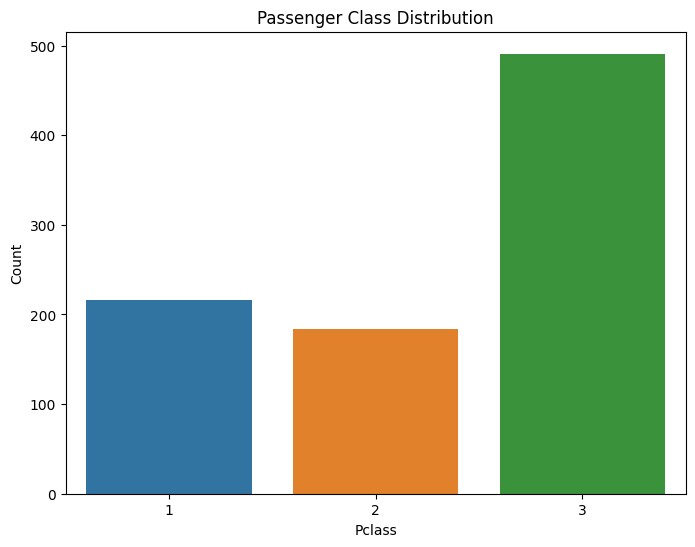

In [88]:

# Passenger Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="Pclass", data=titanic_df)
plt.title("Passenger Class Distribution")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

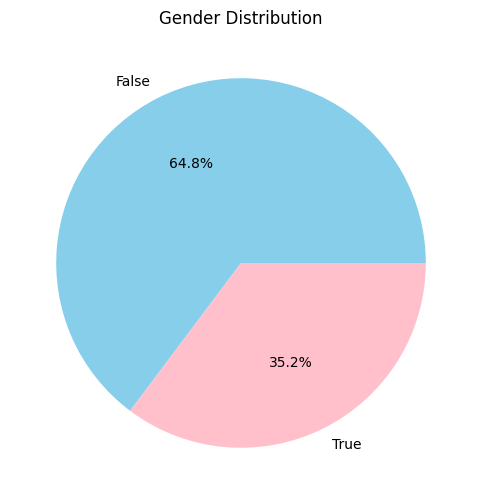

In [89]:
# Gender Distribution
plt.figure(figsize=(6, 6))
titanic_df["Sex_female"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

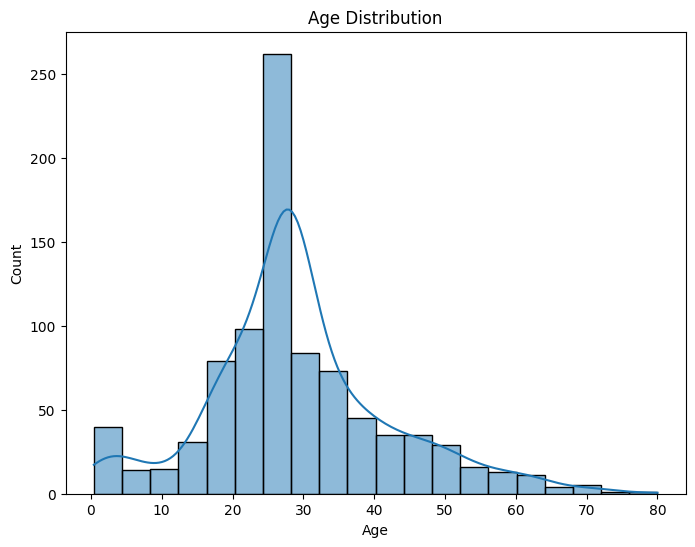

In [90]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

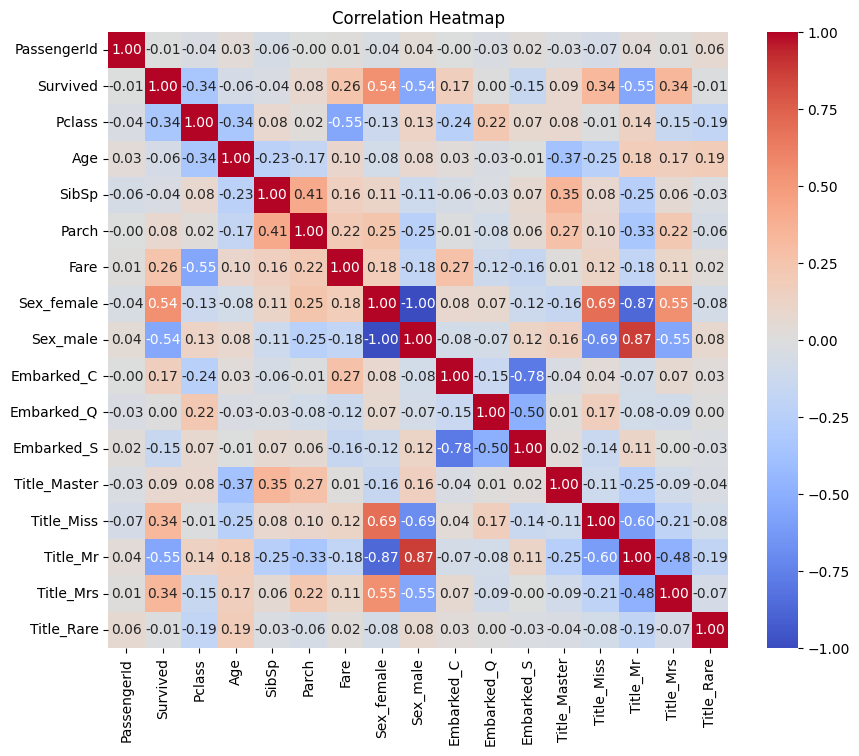

In [91]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

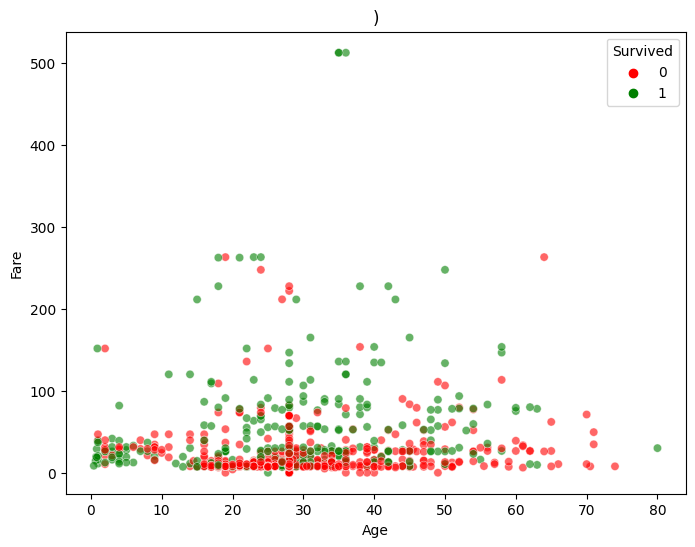

In [92]:
# Age vs. Fare (Colored by Survived
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=titanic_df, palette={0: 'red', 1: 'green'}, alpha=0.6)
plt.title(")")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()